# Day 6

## CNN for solving CIFAR-10

In this section, we try to solve the CIFAR-10 via CNN. This dataset consists of 10 classes as below:

- airplane
- automobile
- bird
- cat
- deer
- dog
- frog
- horse
- ship
- truck

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

from random import randint

Using TensorFlow backend.


In [2]:

dataset = keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = dataset.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0


print "x_train.shape =", x_train.shape
print "x_test.shape  =", x_test.shape


x_train.shape = (50000, 32, 32, 3)
x_test.shape  = (10000, 32, 32, 3)


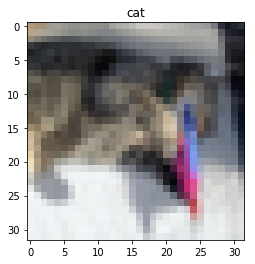

In [3]:
def get_label_name(y):
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                   'dog', 'frog', 'horse', 'ship', 'truck']
    return class_names[int(y)]

rnd_index = randint(0, x_train.shape[0]-1)
plt.imshow(x_train[rnd_index])
plt.title(get_label_name(y_train[rnd_index]))
plt.show()

We have used a convolutional structure with two sets of convolutional layers each containing two Conv2D followed by a Maxx-Pooling layer. The kernel size of Conv layers are all 3x3 and the pooling layers have 2x2 kernel size. The activation function for all of the Conv layers is set to ReLU.

In [4]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Dropout(0.4))
model.add(Conv2D(48, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))


print 'Training...'
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    x_train,
    y_train, 
    epochs=40, 
    batch_size=128,
#     verbose=0,
    validation_data=(x_test, y_test)
)
print 'Training Finished!'

train_loss, train_acc = model.evaluate(x_train,  y_train, verbose=0)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=0)

print ''
print 'Train accuracy:', train_acc
print 'Test accuracy:', test_acc

Training...
Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 304s 6ms/step - loss: 1.6938 - acc: 0.3772 - val_loss: 1.5675 - val_acc: 0.4980
Epoch 2/40
50000/50000 [==============================] - 319s 6ms/step - loss: 1.2629 - acc: 0.5489 - val_loss: 1.2831 - val_acc: 0.5810
Epoch 3/40
50000/50000 [==============================] - 289s 6ms/step - loss: 1.0724 - acc: 0.6206 - val_loss: 1.1331 - val_acc: 0.6394
Epoch 4/40
50000/50000 [==============================] - 291s 6ms/step - loss: 0.9486 - acc: 0.6666 - val_loss: 0.9984 - val_acc: 0.6769
Epoch 5/40
50000/50000 [==============================] - 288s 6ms/step - loss: 0.8425 - acc: 0.7025 - val_loss: 0.9394 - val_acc: 0.6973
Epoch 6/40
50000/50000 [==============================] - 287s 6ms/step - loss: 0.7549 - acc: 0.7353 - val_loss: 0.8302 - val_acc: 0.7361
Epoch 7/40
50000/50000 [==============================] - 288s 6ms/step - loss: 0.7023 - acc: 0.7528 - val_los

As it is showed above the Train accuracy of the network is 98% and the test accuracy of it is 75%. Below, the accuracy values and loss values of the network are plotted throughout the time. We have to note that, the reason to run the network only for 40 epochs is that after this number the network tends to start overfitting the loss value of the train set seemed to stop decreasing.

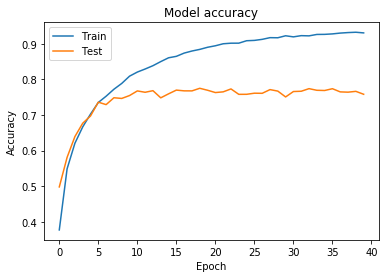

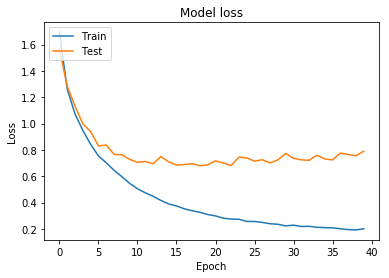

In [5]:
%matplotlib inline

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
